In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from datetime import date
import warnings
warnings.filterwarnings('ignore')

Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

In [26]:
variable_customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
print(variable_customer_df.shape)
variable_customer_df

(9134, 24)


Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor           2/24/11         Employed      F   56274  ...   
1     Bachelor           1/31/11       Unemployed      F       0  ...   
2     Bachelor           2/19/11         Employed      F   48767  ...   
3     Bachelor           1/20/11       Unemployed      M       0  ...   
4     Bachelor            2/3/11         Employed      M   43836  ...   
...        ...               ...              ...    ...     ...  ...   
9129  Bachelor           2/10/11         Employed      M   71941  ...   
9130   College           2/12/11         Employed      F   21604  ...   
9131  Bachelor            2/6/11       Unemployed      M       0  ...   
9132   College            2/3/11         Employed      M   21941  ...   
9133   College           2/14/11       Unemployed      M       0  ...   

     Months Since Policy Inception Number of Open Complaints  \
0                                5                         0   
1                               42                         0   
2                               38                         0   
3                               65                         0   
4                               44                         0   
...                            ...                       ...   
9129                            89                         0   
9130                            28                         0   
9131                            37                         3   
9132                             3                         0   
9133                            90                         0   

      Number of Policies     Policy Type        Policy  Renew Offer Type  \
0                      1  Corporate Auto  Corporate L3            Offer1   
1                      8   Personal Auto   Personal L3            Offer3   
2                      2   Personal Auto   Personal L3            Offer1   
3                      7  Corporate Auto  Corporate L2            Offer1   
4                      1   Personal Auto   Personal L1            Offer1   
...                  ...             ...           ...               ...   
9129                   2   Personal Auto   Personal L1            Offer2   
9130                   1  Corporate Auto  Corporate L3            Offer1   
9131                   2  Corporate Auto  Corporate L2            Offer1   
9132                   3   Personal Auto   Personal L2            Offer3   
9133                   1  Corporate Auto  Corporate L3            Offer4   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent         384.811147   Two-Door Car      Medsize  
1             Agent        1131.464935  Four-Door Car      Medsize  
2             Agent         566.472247   Two-Door Car      Medsize  
3       Call Center         529.881344            SUV      Medsize  
4             Agent         138.130879  Four-Door Car      Medsize  
...             ...                ...            ...          ...  
9129            Web         198.234764  Four-Door Car      Medsize  
9130         Bran

Find all of the categorical data. Save it in a categorical_df variable.

In [27]:
categorical_df = variable_customer_df.select_dtypes(np.object)
categorical_df

Customer       State Response  Coverage Education Effective To Date  \
0     BU79786  Washington       No     Basic  Bachelor           2/24/11   
1     QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2     AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3     WW63253  California       No     Basic  Bachelor           1/20/11   
4     HB64268  Washington       No     Basic  Bachelor            2/3/11   
...       ...         ...      ...       ...       ...               ...   
9129  LA72316  California       No     Basic  Bachelor           2/10/11   
9130  PK87824  California      Yes  Extended   College           2/12/11   
9131  TD14365  California       No  Extended  Bachelor            2/6/11   
9132  UP19263  California       No  Extended   College            2/3/11   
9133  Y167826  California       No  Extended   College           2/14/11   

     EmploymentStatus Gender Location Code Marital Status     Policy Type  \
0            Employed      F      Suburban        Married  Corporate Auto   
1          Unemployed      F      Suburban         Single   Personal Auto   
2            Employed      F      Suburban        Married   Personal Auto   
3          Unemployed      M      Suburban        Married  Corporate Auto   
4            Employed      M         Rural         Single   Personal Auto   
...               ...    ...           ...            ...             ...   
9129         Employed      M         Urban        Married   Personal Auto   
9130         Employed      F      Suburban       Divorced  Corporate Auto   
9131       Unemployed      M      Suburban         Single  Corporate Auto   
9132         Employed      M      Suburban        Married   Personal Auto   
9133       Unemployed      M      Suburban         Single  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Vehicle Class Vehicle Size  
0     Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1      Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2      Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3     Corporate L2           Offer1   Call Center            SUV      Medsize  
4      Personal L1           Offer1         Agent  Four-Door Car      Medsize  
...            ...              ...           ...            ...          ...  
9129   Personal L1           Offer2           Web  Four-Door Car      Medsize  
9130  Corporate L3           Offer1        Branch  Four-Door Car      Medsize  
9131  Corporate L2           Offer1        Branch  Four-Door Car      Medsize  
9132   Personal L2           Offer3        Branch  Four-Door Car        Large  
9133  Corporate L3           Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 16 columns]

Check for NaN values.

Check all unique values of columns.

In [28]:
def fe8 (x:str):
    x = x.replace(" ","_")
    x = x.replace("/", "_")
    return x.lower()

categorical_df.columns = list(map(fe8, categorical_df.columns))
categorical_df

customer       state response  coverage education effective_to_date  \
0     BU79786  Washington       No     Basic  Bachelor           2/24/11   
1     QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2     AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3     WW63253  California       No     Basic  Bachelor           1/20/11   
4     HB64268  Washington       No     Basic  Bachelor            2/3/11   
...       ...         ...      ...       ...       ...               ...   
9129  LA72316  California       No     Basic  Bachelor           2/10/11   
9130  PK87824  California      Yes  Extended   College           2/12/11   
9131  TD14365  California       No  Extended  Bachelor            2/6/11   
9132  UP19263  California       No  Extended   College            2/3/11   
9133  Y167826  California       No  Extended   College           2/14/11   

     employmentstatus gender location_code marital_status     policy_type  \
0            Employed      F      Suburban        Married  Corporate Auto   
1          Unemployed      F      Suburban         Single   Personal Auto   
2            Employed      F      Suburban        Married   Personal Auto   
3          Unemployed      M      Suburban        Married  Corporate Auto   
4            Employed      M         Rural         Single   Personal Auto   
...               ...    ...           ...            ...             ...   
9129         Employed      M         Urban        Married   Personal Auto   
9130         Employed      F      Suburban       Divorced  Corporate Auto   
9131       Unemployed      M      Suburban         Single  Corporate Auto   
9132         Employed      M      Suburban        Married   Personal Auto   
9133       Unemployed      M      Suburban         Single  Corporate Auto   

            policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0     Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1      Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2      Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3     Corporate L2           Offer1   Call Center            SUV      Medsize  
4      Personal L1           Offer1         Agent  Four-Door Car      Medsize  
...            ...              ...           ...            ...          ...  
9129   Personal L1           Offer2           Web  Four-Door Car      Medsize  
9130  Corporate L3           Offer1        Branch  Four-Door Car      Medsize  
9131  Corporate L2           Offer1        Branch  Four-Door Car      Medsize  
9132   Personal L2           Offer3        Branch  Four-Door Car        Large  
9133  Corporate L3           Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 16 columns]

In [29]:
categorical_df.isna().sum()/len(categorical_df)

customer             0.0
state                0.0
response             0.0
coverage             0.0
education            0.0
effective_to_date    0.0
employmentstatus     0.0
gender               0.0
location_code        0.0
marital_status       0.0
policy_type          0.0
policy               0.0
renew_offer_type     0.0
sales_channel        0.0
vehicle_class        0.0
vehicle_size         0.0
dtype: float64

In [30]:
categorical_df.nunique()

customer             9134
state                   5
response                2
coverage                3
education               5
effective_to_date      59
employmentstatus        5
gender                  2
location_code           3
marital_status          3
policy_type             3
policy                  9
renew_offer_type        4
sales_channel           4
vehicle_class           6
vehicle_size            3
dtype: int64

In [31]:

categorical_df = categorical_df.drop(['effective_to_date', 'customer'], axis = 1)  # here we drop date aswell because it was use in the numerical data
categorical_df

state response  coverage education employmentstatus gender  \
0     Washington       No     Basic  Bachelor         Employed      F   
1        Arizona       No  Extended  Bachelor       Unemployed      F   
2         Nevada       No   Premium  Bachelor         Employed      F   
3     California       No     Basic  Bachelor       Unemployed      M   
4     Washington       No     Basic  Bachelor         Employed      M   
...          ...      ...       ...       ...              ...    ...   
9129  California       No     Basic  Bachelor         Employed      M   
9130  California      Yes  Extended   College         Employed      F   
9131  California       No  Extended  Bachelor       Unemployed      M   
9132  California       No  Extended   College         Employed      M   
9133  California       No  Extended   College       Unemployed      M   

     location_code marital_status     policy_type        policy  \
0         Suburban        Married  Corporate Auto  Corporate L3   
1         Suburban         Single   Personal Auto   Personal L3   
2         Suburban        Married   Personal Auto   Personal L3   
3         Suburban        Married  Corporate Auto  Corporate L2   
4            Rural         Single   Personal Auto   Personal L1   
...            ...            ...             ...           ...   
9129         Urban        Married   Personal Auto   Personal L1   
9130      Suburban       Divorced  Corporate Auto  Corporate L3   
9131      Suburban         Single  Corporate Auto  Corporate L2   
9132      Suburban        Married   Personal Auto   Personal L2   
9133      Suburban         Single  Corporate Auto  Corporate L3   

     renew_offer_type sales_channel  vehicle_class vehicle_size  
0              Offer1         Agent   Two-Door Car      Medsize  
1              Offer3         Agent  Four-Door Car      Medsize  
2              Offer1         Agent   Two-Door Car      Medsize  
3              Offer1   Call Center            SUV      Medsize  
4              Offer1         Agent  Four-Door Car      Medsize  
...               ...           ...            ...          ...  
9129           Offer2           Web  Four-Door Car      Medsize  
9130           Offer1        Branch  Four-Door Car      Medsize  
9131           Offer1        Branch  Four-Door Car      Medsize  
9132           Offer3        Branch  Four-Door Car        Large  
9133           Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 14 columns]

In [32]:
categorical_df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

some of the categoricals columns don't make sense, some have Numerical values : 'Policy', Renew Offer Type' and 'policy_type'
we decide to change 'renew_offer_type' and 'policy' in order to have a full categorical columns.
Offer1 to OfferA
and 
Corporate L1 to Corporate A

cheking now for value_counts in each columns

In [33]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [34]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [35]:
categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [36]:
categorical_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [37]:
categorical_df['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

we decide to drop 'policy' because it doesn't provide us with more information than the ones we have already in 'policy_type'. When building our model the distinction for those column won't affect our predictions that much, and we would have to check with the client what is the specificity of the policies.

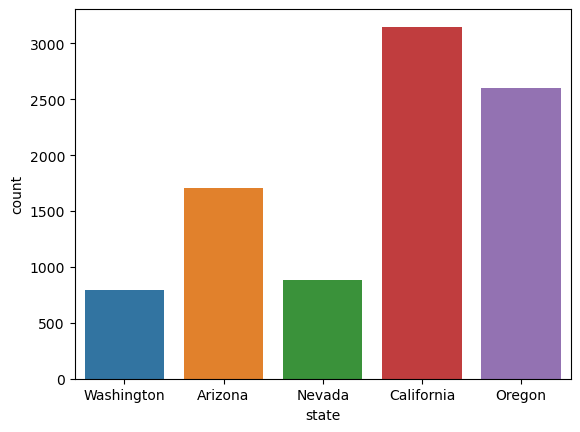

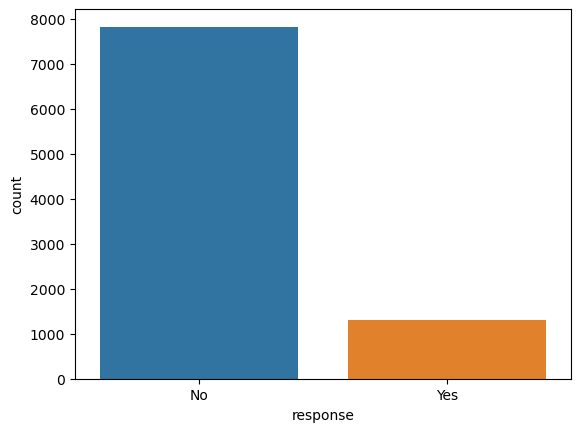

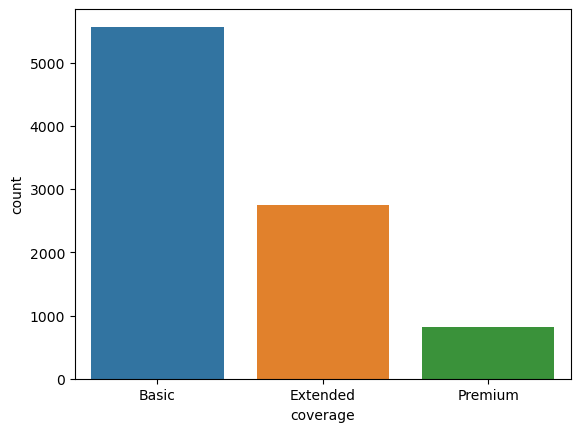

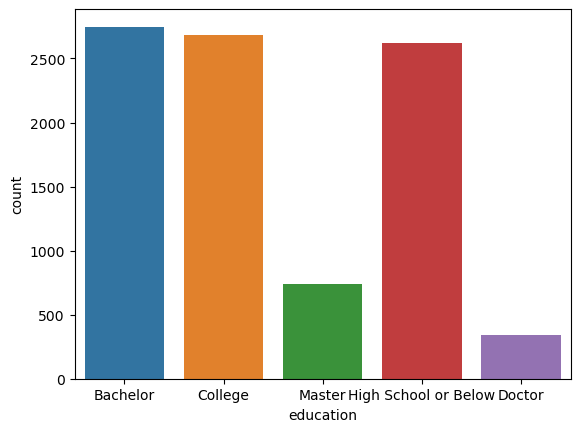

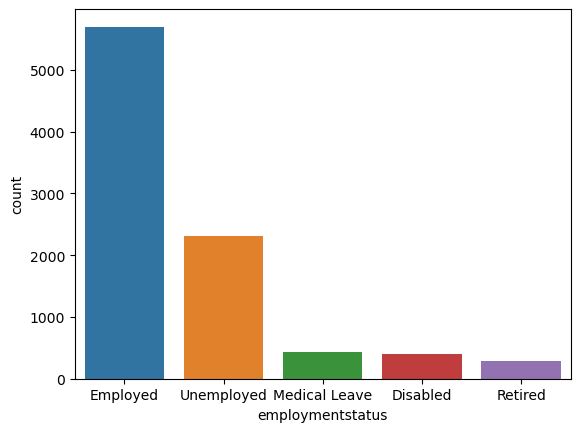

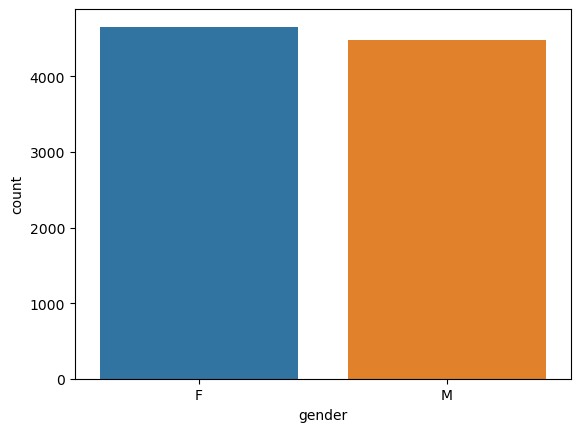

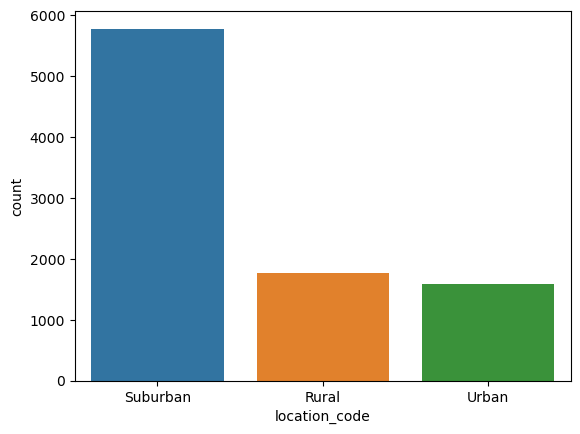

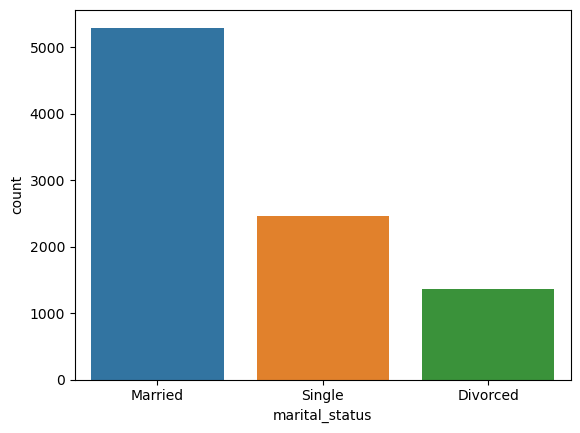

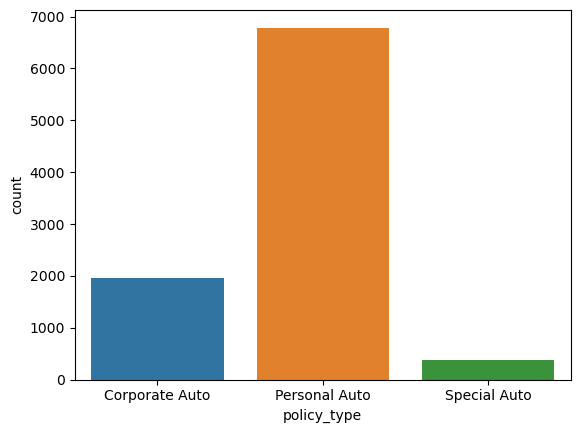

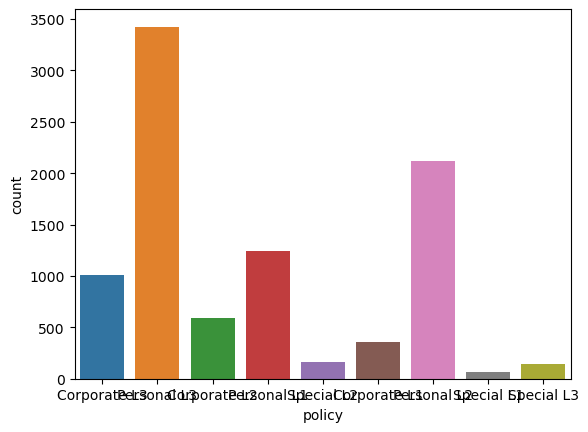

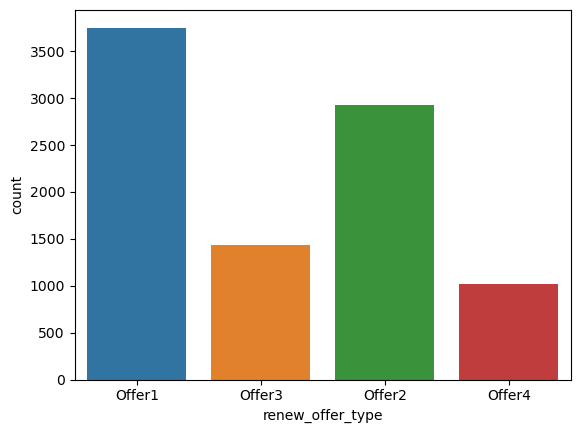

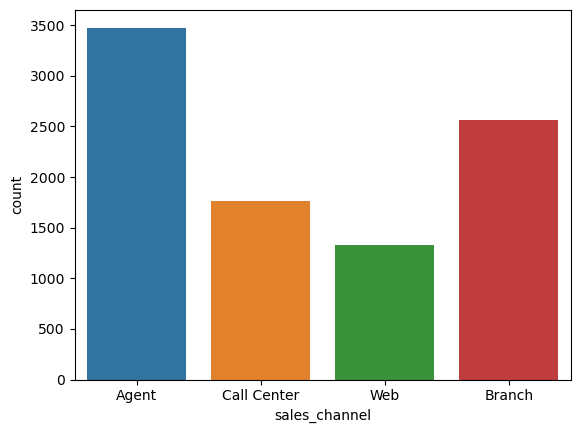

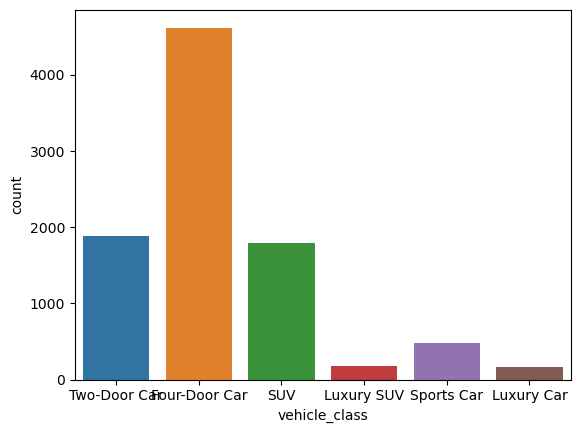

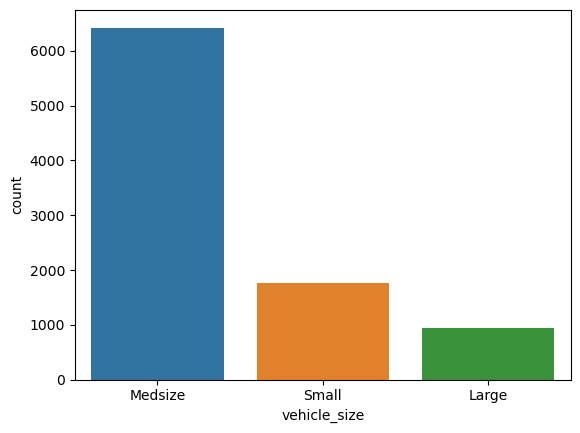

In [38]:
def cntplot_cat(df):
    for col in df.columns:
        sns.countplot(x=df[col])
        plt.show()
    return None
   

cntplot_cat(categorical_df)

In [39]:
# categorical_columns = [col for col in categorical if (len(categorical_df[col].unique()) < (categorical_df.shape[0] * 0.01))]

we are going the make some changes in the data :
- in 'employment status' : we are grouping medical leaves, disabled and retires to a category 'other'
- 'renew_offer_type : changing the numerical values into a categorical value
- vehicule_class : we group 'luxury SUV', 'Sports' and 'Luxury cars' into a 'premium' category
- policy_type : we remove 'auto'  from the values in that column
- education was also grouped into categories, master degree and doctor degre can be put into 'college'.

In [40]:
# removing 'auto' in the policy_type


def get_auto(x):
    x = str(x)
    x = x.rstrip(' Auto')
    return str(x)

categorical_df['policy_type'] = categorical_df['policy_type'].apply(get_auto)
categorical_df['policy_type'] 



0       Corporate
1        Personal
2        Personal
3       Corporate
4        Personal
          ...    
9129     Personal
9130    Corporate
9131    Corporate
9132     Personal
9133    Corporate
Name: policy_type, Length: 9134, dtype: object

In [41]:
# changing number into strings in renew_offer_type :
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace('1', 'A')
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace('2', 'B')
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace('3', 'C')
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].str.replace('4', 'D')
categorical_df.head(10)



state response  coverage             education employmentstatus  \
0   Washington       No     Basic              Bachelor         Employed   
1      Arizona       No  Extended              Bachelor       Unemployed   
2       Nevada       No   Premium              Bachelor         Employed   
3   California       No     Basic              Bachelor       Unemployed   
4   Washington       No     Basic              Bachelor         Employed   
5       Oregon      Yes     Basic              Bachelor         Employed   
6       Oregon      Yes     Basic               College         Employed   
7      Arizona       No   Premium                Master       Unemployed   
8       Oregon      Yes     Basic              Bachelor    Medical Leave   
9       Oregon       No  Extended               College         Employed   
10  California       No     Basic               College       Unemployed   
11  California       No     Basic               College       Unemployed   
12  California       No   Premium                Master         Employed   
13     Arizona      Yes     Basic  High School or Below         Employed   
14  California       No     Basic               College         Employed   
15      Oregon       No     Basic              Bachelor         Employed   
16      Nevada       No     Basic  High School or Below    Medical Leave   
17  California       No     Basic               College    Medical Leave   
18      Oregon       No     Basic               College         Employed   
19  California       No   Premium  High School or Below         Employed   
20      Oregon       No     Basic  High School or Below         Employed   
21  Washington       No  Extended              Bachelor         Disabled   
22     Arizona      Yes     Basic              Bachelor    Medical Leave   
23      Nevada       No     Basic              Bachelor       Unemployed   
24  California       No     Basic              Bachelor         Disabled   

   gender location_code marital_status policy_type        policy  \
0       F      Suburban        Married   Corporate  Corporate L3   
1       F      Suburban         Single    Personal   Personal L3   
2       F      Suburban        Married    Personal   Personal L3   
3       M      Suburban        Married   Corporate  Corporate L2   
4       M         Rural         Single    Personal   Personal L1   
5       F         Rural        Married    Personal   Personal L3   
6       F      Suburban        Married   Corporate  Corporate L3   
7       M         Urban         Single   Corporate  Corporate L3   
8       M      Suburban       Divorced   Corporate  Corporate L3   
9       F         Urban        Married     Special    Special L2   
10      M      Suburban         Single    Personal   Personal L3   
11      F      Suburban        Married    Personal   Personal L3   
12      M         Urban        Married   Corporate  Corporate L1   
13      M      Suburban        Married   Corporate  Corporate L3   
14      M         Urban         Single   Corporate  Corporate L3   
15      F         Rural        Married   Corporate  Corporate L2   
16      M      Suburban        Married    Personal   Personal L3   
17      M      Suburban        Married    Personal   Personal L2   
18      M         Urban        Married    Personal   Personal L2   
19      F      Suburban        Married   Corporate  Corporate L2   
20      M      Suburban         Single    Personal   Personal L2   
21      F      Suburban       Divorced    Personal   Personal L3   
22      M      Suburban       Divorced    Personal   Personal L3   
23      F      Suburban         Single   Corporate  Corporate L3   
24      F      Suburban        Married   Corporate  Corporate L2   

   renew_offer_type sales_channel  vehicle_class vehicle_size  
0            OfferA         Agent   Two-Door Car      Medsize  
1            OfferC         Agent  Four-Door Car      Medsize  
2            OfferA         Agent   Two-Door Car      Medsize  
3      

In [42]:
# grouping 'employment status' into 3 categories

categorical_df['employmentstatus'] = np.where(categorical_df.employmentstatus.isin(['Disabled', 'Retired', 'Medical Leave']),'other', categorical_df.employmentstatus)
categorical_df['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
other         1119
Name: employmentstatus, dtype: int64

In [43]:
# changes to vehicle_class
categorical_df['vehicle_class'] = np.where(categorical_df.vehicle_class.isin(['Luxury SUV', 'Sports Car', 'Luxury Car']),'premium', categorical_df.vehicle_class)
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
premium           831
Name: vehicle_class, dtype: int64

In [44]:
# education was also grouped Master degree and Doctor's degree into college

categorical_df["education"] = np.where(categorical_df.education.isin(['High School or Below']),'pre_college', categorical_df.education)
# categorical_df.head(25)

def educ(x):
    if 'Master' in x:
        return 'College'
    elif 'Doctor' in x:
        return 'College'
    # elif 'High School or Below':
    #     return 'pre_college'
    else:
        return x

categorical_df['education'] = list(map(educ,categorical_df['education']))

display(categorical_df.head(10))
categorical_df.education.value_counts()

state response  coverage    education employmentstatus gender  \
0   Washington       No     Basic     Bachelor         Employed      F   
1      Arizona       No  Extended     Bachelor       Unemployed      F   
2       Nevada       No   Premium     Bachelor         Employed      F   
3   California       No     Basic     Bachelor       Unemployed      M   
4   Washington       No     Basic     Bachelor         Employed      M   
5       Oregon      Yes     Basic     Bachelor         Employed      F   
6       Oregon      Yes     Basic      College         Employed      F   
7      Arizona       No   Premium      College       Unemployed      M   
8       Oregon      Yes     Basic     Bachelor            other      M   
9       Oregon       No  Extended      College         Employed      F   
10  California       No     Basic      College       Unemployed      M   
11  California       No     Basic      College       Unemployed      F   
12  California       No   Premium      College         Employed      M   
13     Arizona      Yes     Basic  pre_college         Employed      M   
14  California       No     Basic      College         Employed      M   
15      Oregon       No     Basic     Bachelor         Employed      F   
16      Nevada       No     Basic  pre_college            other      M   
17  California       No     Basic      College            other      M   
18      Oregon       No     Basic      College         Employed      M   
19  California       No   Premium  pre_college         Employed      F   
20      Oregon       No     Basic  pre_college         Employed      M   
21  Washington       No  Extended     Bachelor            other      F   
22     Arizona      Yes     Basic     Bachelor            other      M   
23      Nevada       No     Basic     Bachelor       Unemployed      F   
24  California       No     Basic     Bachelor            other      F   
25      Oregon       No     Basic      College         Employed      M   
26  California       No   Premium     Bachelor       Unemployed      F   
27  Washington       No  Extended      College            other      F   
28     Arizona       No   Premium      College         Employed      F   
29      Oregon       No  Extended      College         Employed      F   
30     Arizona       No     Basic      College         Employed      M   
31      Nevada       No  Extended  pre_college         Employed      M   
32  California       No     Basic     Bachelor       Unemployed      M   
33  Washington       No     Basic     Bachelor         Employed      M   
34      Oregon       No     Basic     Bachelor         Employed      F   
35     Arizona       No     Basic  pre_college         Employed      F   
36  California       No   Premium     Bachelor         Employed      M   
37      Oregon       No  Extended      College         Employed      F   
38      Oregon       No  Extended     Bachelor       Unemployed      M   
39     Arizona       No     Basic  pre_college         Employed      M   
40      Nevada       No     Basic  pre_college       Unemployed      F   
41      Oregon      Yes     Basic      College         Employed      F   
42  California      Yes  Extended     Bachelor         Employed      F   
43     Arizona       No     Basic  pre_college         Employed      M   
44  Washington       No     Basic      College         Employed      M   
45      Oregon       No   Premium      College            other      F   
46     Arizona       No     Basic     Bachelor       Unemployed      M   
47      Oregon       No     Basic  pre_college         Employed      F   
48  California       No  Extended     Bachelor       Unemployed      F   
49     Arizona       No     Basic  pre_college       Unemployed      F   

   location_code marital_status policy_type        policy renew_offer_type  \
0       Suburban        Married   Corporate  Corporate L3           OfferA   
1       Suburban         Single    Personal   Personal L3           OfferC   


College        3764
Bachelor       2748
pre_college    2622
Name: education, dtype: int64

In [45]:
categorical_df = categorical_df.drop(['policy'], axis = 1)
categorical_df.head(25)

state response  coverage    education employmentstatus gender  \
0   Washington       No     Basic     Bachelor         Employed      F   
1      Arizona       No  Extended     Bachelor       Unemployed      F   
2       Nevada       No   Premium     Bachelor         Employed      F   
3   California       No     Basic     Bachelor       Unemployed      M   
4   Washington       No     Basic     Bachelor         Employed      M   
5       Oregon      Yes     Basic     Bachelor         Employed      F   
6       Oregon      Yes     Basic      College         Employed      F   
7      Arizona       No   Premium      College       Unemployed      M   
8       Oregon      Yes     Basic     Bachelor            other      M   
9       Oregon       No  Extended      College         Employed      F   
10  California       No     Basic      College       Unemployed      M   
11  California       No     Basic      College       Unemployed      F   
12  California       No   Premium      College         Employed      M   
13     Arizona      Yes     Basic  pre_college         Employed      M   
14  California       No     Basic      College         Employed      M   
15      Oregon       No     Basic     Bachelor         Employed      F   
16      Nevada       No     Basic  pre_college            other      M   
17  California       No     Basic      College            other      M   
18      Oregon       No     Basic      College         Employed      M   
19  California       No   Premium  pre_college         Employed      F   
20      Oregon       No     Basic  pre_college         Employed      M   
21  Washington       No  Extended     Bachelor            other      F   
22     Arizona      Yes     Basic     Bachelor            other      M   
23      Nevada       No     Basic     Bachelor       Unemployed      F   
24  California       No     Basic     Bachelor            other      F   

   location_code marital_status policy_type renew_offer_type sales_channel  \
0       Suburban        Married   Corporate           OfferA         Agent   
1       Suburban         Single    Personal           OfferC         Agent   
2       Suburban        Married    Personal           OfferA         Agent   
3       Suburban        Married   Corporate           OfferA   Call Center   
4          Rural         Single    Personal           OfferA         Agent   
5          Rural        Married    Personal           OfferB           Web   
6       Suburban        Married   Corporate           OfferA         Agent   
7          Urban         Single   Corporate           OfferA         Agent   
8       Suburban       Divorced   Corporate           OfferA         Agent   
9          Urban        Married     Special           OfferB        Branch   
10      Suburban         Single    Personal           OfferA         Agent   
11      Suburban        Married    Personal           OfferB         Agent   
12         Urban        Married   Corporate           OfferB         Agent   
13      Suburban        Married   Corporate           OfferB        Branch   
14         Urban         Single   Corporate           OfferD   Call Center   
15         Rural        Married   Corporate           OfferB        Branch   
16      Suburban        Married    Personal           OfferB   Call Center   
17      Suburban        Married    Personal           OfferC   Call Center   
18         Urban        Married    Personal           OfferB        Branch   
19      Suburban        Married   Corporate           OfferA   Call Center   
20      Suburban         Single    Personal           OfferA        Branch   
21      Suburban       Divorced    Personal           OfferD   Call Center   
22      Suburban       Divorced    Personal           OfferA         Agent   
23      Suburban         Single   Corporate           OfferA        Branch   
24      Suburban        Married   Corporate           OfferB        Branch   

    vehicle_class vehicle_size  
0    Two-Door Car     

We apply some changes in our dataframe for categoricals.